In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from pytz import timezone
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
data_dir = '/Users/Karolina/ProjectsDataScience/data_science_environment/data/'
file_list = ['MyDataSpotify/StreamingHistory1.json',
             'MyDataSpotify/StreamingHistory2.json',
             'MyDataSpotify/StreamingHistory3.json',
             'MyDataSpotify/StreamingHistory4.json']

dfs = [] # an empty list to store the data frames
for file in file_list:
    data = pd.read_json(data_dir+file) # read data frame from json file
    dfs.append(data) # append the data frame to the list

df = pd.concat(dfs, ignore_index=True) # concatenate all the data frames in the list.

In [3]:
df.head()

,endTime,artistName,trackName,msPlayed
0,2021-01-23 14:36,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464
1,2021-01-23 14:39,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464
2,2021-01-23 14:43,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464
3,2021-01-23 14:46,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464
4,2021-01-23 14:50,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37735 entries, 0 to 37734
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     37735 non-null  object
 1   artistName  37735 non-null  object
 2   trackName   37735 non-null  object
 3   msPlayed    37735 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [5]:
df.endTime = pd.to_datetime(df.endTime, infer_datetime_format=True) 

#Set the current time to US Pacific timezone
df['endTimeTz']= df.endTime.dt.tz_localize(tz='UTC')

#convert US Pacific to Europe/Berlin Timezone
df['endTimeTzEU']=df.endTimeTz.dt.tz_convert(tz='Europe/Berlin')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37735 entries, 0 to 37734
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype                        
---  ------       --------------  -----                        
 0   endTime      37735 non-null  datetime64[ns]               
 1   artistName   37735 non-null  object                       
 2   trackName    37735 non-null  object                       
 3   msPlayed     37735 non-null  int64                        
 4   endTimeTz    37735 non-null  datetime64[ns, UTC]          
 5   endTimeTzEU  37735 non-null  datetime64[ns, Europe/Berlin]
dtypes: datetime64[ns, Europe/Berlin](1), datetime64[ns, UTC](1), datetime64[ns](1), int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
df['hour'] = df.endTimeTzEU.dt.hour
df['month'] = df['endTimeTzEU'].dt.to_period('M').apply(lambda r: r.start_time)


df['sPlayed'] = df['msPlayed']/(1000)
df['mPlayed'] = df['sPlayed']/(60)
df['hPlayed'] = df['sPlayed']/(60*60)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [7]:
df.head()

,endTime,artistName,trackName,msPlayed,endTimeTz,endTimeTzEU,hour,month,sPlayed,mPlayed,hPlayed
0,2021-01-23 14:36:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:36:00+00:00,2021-01-23 15:36:00+01:00,15,2021-01-01,203.464,3.391067,0.056518
1,2021-01-23 14:39:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:39:00+00:00,2021-01-23 15:39:00+01:00,15,2021-01-01,203.464,3.391067,0.056518
2,2021-01-23 14:43:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:43:00+00:00,2021-01-23 15:43:00+01:00,15,2021-01-01,203.464,3.391067,0.056518
3,2021-01-23 14:46:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:46:00+00:00,2021-01-23 15:46:00+01:00,15,2021-01-01,203.464,3.391067,0.056518
4,2021-01-23 14:50:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:50:00+00:00,2021-01-23 15:50:00+01:00,15,2021-01-01,203.464,3.391067,0.056518


In [8]:
minutesPerMonth = pd.DataFrame(df.groupby('month')['mPlayed'].sum())
minutesPerMonth

,mPlayed
month,
2021-01-01,2557.524400
2021-02-01,8701.312250
2021-03-01,10572.627633
2021-04-01,8702.578650
2021-05-01,10382.081483
2021-06-01,7191.195233
2021-07-01,8133.350600
2021-08-01,8246.205717
2021-09-01,7072.260817


In [15]:
# had issues with cleaning cache for matplotlib
from matplotlib import font_manager

font_dirs = ['/Users/Karolina/Downloads'] 
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)



Populating the interactive namespace from numpy and matplotlib


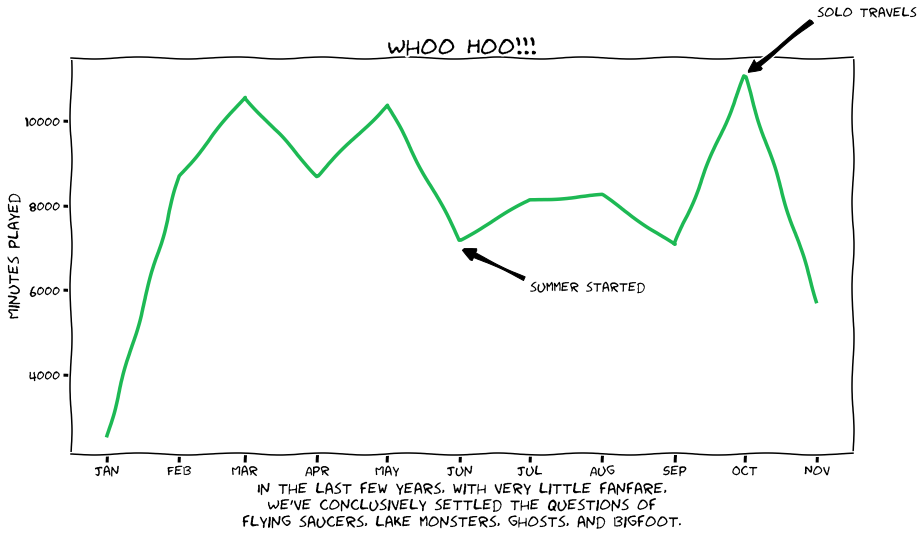

In [243]:
%pylab inline

plt.xkcd()

# set font
plt.rcParams['font.family'] = 'Humor Sans'
fig = plt.figure(figsize=(14, 16))
ax = fig.add_subplot(211)
ax.plot(minutesPerMonth, c='#1DB954', linewidth=3.5)
plt.title('Whoo Hoo!!!', size=24)

# Define the date format
date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)



ax.set_xlabel(("In the last few years, with very little fanfare,\n"
               "We've conclusively settled the questions of\n"
               "flying saucers, lake monsters, ghosts, and bigfoot."),
              size=16)
ax.set_ylabel("Minutes played", size=16)

#ax.text(datetime.date(2021, 7, 1), 6000, "!!!")
ax.annotate('summer started', xy=(datetime.date(2021, 6, 1), 7000), xytext=(datetime.date(2021, 7, 1), 6000),
            arrowprops=dict(facecolor='black', shrink=0.05))


ax.annotate('solo travels', xy=(datetime.date(2021, 10, 1), 11100), xytext=(datetime.date(2021, 11, 1), 12500),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

In [30]:
conditions = [df['artistName'] == 'Justin Bieber', 
              df['mPlayed'] >= 10]

outputs = ['Justin Bieber', 'Podcast']

df['streamType'] = np.select(conditions, outputs, 'Music')
df.head()

,endTime,artistName,trackName,msPlayed,endTimeTz,endTimeTzEU,hour,month,sPlayed,mPlayed,hPlayed,streamType
0,2021-01-23 14:36:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:36:00+00:00,2021-01-23 15:36:00+01:00,15,2021-01-01,203.464,3.391067,0.056518,Music
1,2021-01-23 14:39:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:39:00+00:00,2021-01-23 15:39:00+01:00,15,2021-01-01,203.464,3.391067,0.056518,Music
2,2021-01-23 14:43:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:43:00+00:00,2021-01-23 15:43:00+01:00,15,2021-01-01,203.464,3.391067,0.056518,Music
3,2021-01-23 14:46:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:46:00+00:00,2021-01-23 15:46:00+01:00,15,2021-01-01,203.464,3.391067,0.056518,Music
4,2021-01-23 14:50:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:50:00+00:00,2021-01-23 15:50:00+01:00,15,2021-01-01,203.464,3.391067,0.056518,Music


In [34]:
streamTypes = pd.DataFrame(df.groupby('streamType')['mPlayed'].sum())
streamTypes

,mPlayed
streamType,
Justin Bieber,7907.210167
Music,74949.240767
Podcast,5503.302950


In [50]:
streamTypes = df.groupby(["streamType"])\
                .agg({"mPlayed" : "sum"})[["mPlayed"]]\
                .apply(lambda x: 100*x/x.sum())\
                .sort_values(by="mPlayed", ascending=False).reset_index()

streamTypes

,streamType,mPlayed
0,Music,84.822827
1,Justin Bieber,8.948882
2,Podcast,6.228291


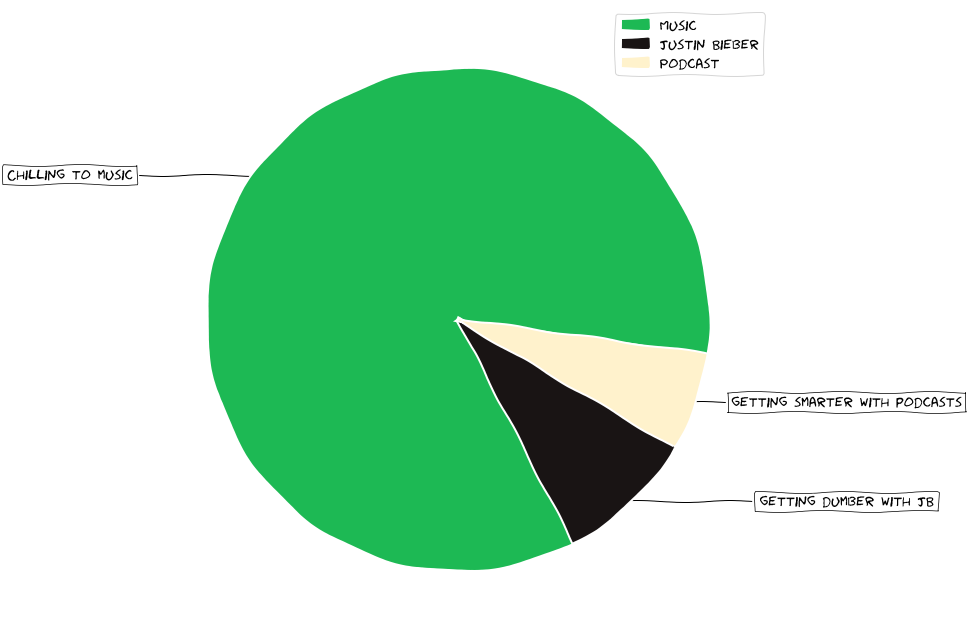

In [233]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0.08, bottom=0.10, right=0.99, top=0.97)
fig.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
#ax = fig.add_subplot(211)

myLabels = ['Chilling to music', 'getting dumber with JB', 'getting smarter with podcasts']
mycolors = ['#1DB954','#191414','#fff2cc']

patches, texts = pie = plt.pie(streamTypes.mPlayed, colors = mycolors, startangle=-8, labeldistance=0.8)

#donut version
#plt.pie(streamTypes.mPlayed, labels = myLabels, colors = mycolors, wedgeprops=dict(width=0.5), startangle=-40)


# Annotate

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
kw = dict(xycoords='data',textcoords='data',arrowprops=arrowprops, 
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(patches):
    ang = (p.theta2 - p.theta1)/2.+p.theta1
    y = np.sin(ang/180.*np.pi)
    x = 1.55*np.sign(np.cos(ang/180.*np.pi))
    plt.gca().annotate(myLabels[i], xy=(0,0), xytext=(x, y),horizontalalignment='center', **kw)
 #   plt.gca().annotate(myLabels[i], xy=(0.6*x, 0.6*y), xytext=(1.2*x,1.2*y),
  #                     arrowprops=dict(arrowstyle="->",
   #                    connectionstyle="angle3,angleA=0,angleB=-90"),
    #                  horizontalalignment='center')


plt.legend(streamTypes.streamType)
plt.show() 